In [1]:
matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df1 = pd.read_csv("df_final_web_data_pt_1.txt")
df2 = pd.read_csv("df_final_web_data_pt_2.txt")

In [4]:
df_demo = pd.read_csv("df_final_demo.txt")
df_experiment = pd.read_csv("df_final_experiment_clients.txt")

Concatenamos los dos dataframes sobre web data

In [5]:
df_web = pd.concat ([df1, df2], ignore_index=True, axis=0)

### Comenzamos limpieza del df demográfico

Creamos nuevas columnas para limpiar los meses y años

In [6]:
df_demo.drop(columns=['clnt_tenure_yr'], inplace=True)

In [7]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
df_demo['tenure_months_resto'] = (df_demo['clnt_tenure_mnth'].fillna(0) % 12).astype(int)

In [8]:
#creamos el nuevo orden deseado de las columnas nuevas
cols = df_demo.columns.tolist()

# Eliminamos las columnas que vamos a reubicar
cols.remove('tenure_years')
cols.remove('tenure_months_resto')

# Insertamos las nuevas columnas en la posición deseada
cols.insert(2, 'tenure_years')          
cols.insert(3, 'tenure_months_resto')   

df_demo = df_demo[cols]

In [9]:
#rellenamos nulos
df_demo['clnt_age'] = df_demo['clnt_age'].fillna(0)
df_demo['num_accts'] = df_demo['num_accts'].fillna(0)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].fillna(0)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].fillna(0)
df_demo['bal'] = df_demo['bal'].fillna(0)  

In [10]:
#convertimos a enteros
df_demo['clnt_age'] = df_demo['clnt_age'].astype(int)
df_demo['num_accts'] = df_demo['num_accts'].astype(int)
df_demo['calls_6_mnth'] = df_demo['calls_6_mnth'].astype(int)
df_demo['logons_6_mnth'] = df_demo['logons_6_mnth'].astype(int)

In [11]:
#redondeamos la columna bal a dos decimales
df_demo['bal'] = df_demo['bal'].round(2)

### Comenzamos el análisis

#### Análisis general

In [12]:
from data_cleaning_utils import *

In [13]:
overview(df_demo)


Shape: (70609, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   client_id            70609 non-null  int64  
 1   clnt_tenure_mnth     70595 non-null  float64
 2   tenure_years         70609 non-null  int64  
 3   tenure_months_resto  70609 non-null  int64  
 4   clnt_age             70609 non-null  int64  
 5   gendr                70595 non-null  object 
 6   num_accts            70609 non-null  int64  
 7   bal                  70609 non-null  float64
 8   calls_6_mnth         70609 non-null  int64  
 9   logons_6_mnth        70609 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 5.4+ MB
None

Tipos de datos:
client_id                int64
clnt_tenure_mnth       float64
tenure_years             int64
tenure_months_resto      int64
clnt_age                 int64
gendr                   o

In [14]:
df_demo.columns

Index(['client_id', 'clnt_tenure_mnth', 'tenure_years', 'tenure_months_resto',
       'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')

Ver el género de todos nuestros clientes

In [15]:
df_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_17051/3461465121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")


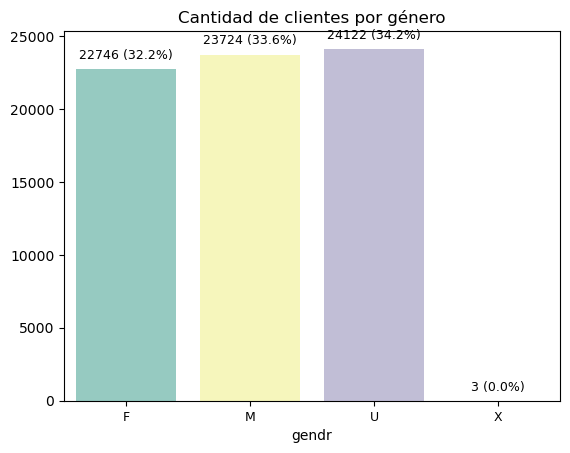

In [16]:
gendr= df_demo['gendr'].value_counts().sort_index()

ax =sns.barplot(x=gendr.index, y=gendr.values, palette="Set3")
plt.title("Cantidad de clientes por género")
plt.xticks(fontsize=9)

# Añadir etiquetas de texto con count y %
total = gendr.sum()
for i, count in enumerate(gendr.values):
    pct = count / total * 100
    ax.text(i, count + total * 0.01, f"{count} ({pct:.1f}%)", ha='center', fontsize=9)

plt.show()

Ver la edad de todos nuestros clientes.

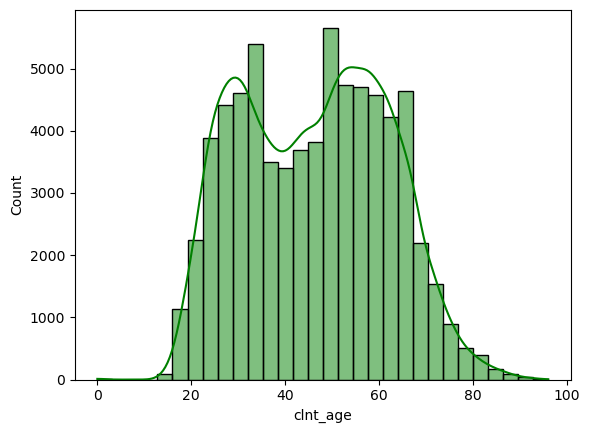

In [17]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=30, color="green")
plt.show()

La antiguedad de todos nuestros clientes

/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_17051/3696678643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")


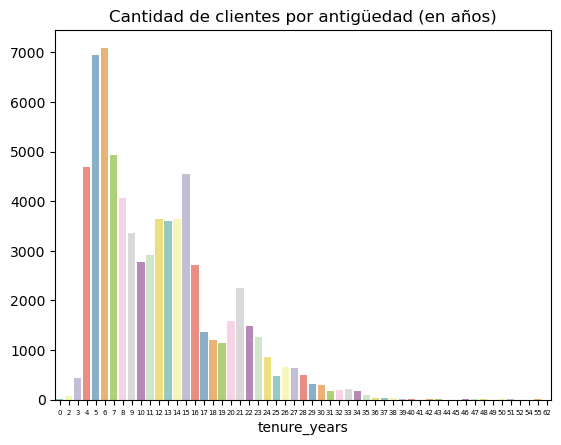

In [18]:
df_demo['tenure_years'] = (df_demo['clnt_tenure_mnth'].fillna(0) // 12).astype(int)
conteo_años = df_demo['tenure_years'].value_counts().sort_index()
sns.barplot(x=conteo_años.index, y=conteo_años.values, palette="Set3")
plt.title("Cantidad de clientes por antigüedad (en años)")
plt.xticks(fontsize=5)
plt.show()

### Analisis del cliente principal

Creación de quintiles por cantidad de bal , así categorizamos los que invierten más y menos con nosotros.

In [19]:
labels = ['Muy baja inversión', 'Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']

df_demo['rango_inversion'] = pd.cut(df_demo['bal'], bins=5, labels=labels)

In [20]:
grupos = ['Baja inversión', 'Media inversión', 'Alta inversión', 'Muy alta inversión']
df_top_4_quintiles = df_demo[df_demo['rango_inversion'].isin(grupos)]

In [21]:
conteo_rangos = df_demo['rango_inversion'].value_counts().sort_index()

In [22]:
corte = pd.cut(df_demo['bal'], bins=5)

# Ver los intervalos exactos
print(corte.cat.categories)

IntervalIndex([   (-16320.04, 3264008.03],   (3264008.03, 6528016.06],
                 (6528016.06, 9792024.09],  (9792024.09, 13056032.12],
               (13056032.12, 16320040.15]],
              dtype='interval[float64, right]')


In [23]:
# Muy baja inversión , está la mayoría , y luego los otros 4 quintiles:
#Baja inversión           79
#Media inversión          10
#Alta inversión            1
#Muy alta inversión        1
print(conteo_rangos)


rango_inversion
Muy baja inversión    70518
Baja inversión           79
Media inversión          10
Alta inversión            1
Muy alta inversión        1
Name: count, dtype: int64


/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_17051/2692600834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")


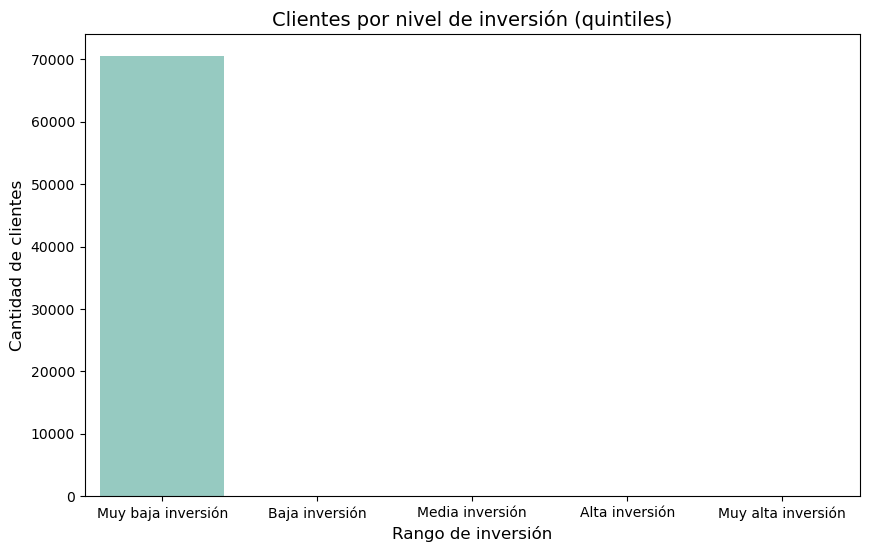

In [24]:
#la cantidad de gente según categoría de bal representado en barplot 

plt.figure(figsize=(10, 6))

sns.barplot(x=conteo_rangos.index, y=conteo_rangos.values, palette="Set3")

plt.title("Clientes por nivel de inversión (quintiles)", fontsize=14)
plt.xlabel("Rango de inversión", fontsize=12)
plt.ylabel("Cantidad de clientes", fontsize=12)

plt.show()

Las veces que entran en la web los  4 quintiles que son los que nos interesan, tienen más dinero pero son menor en número. 

In [25]:
total_logons = df_top_4_quintiles['logons_6_mnth'].sum()
print("Total de logins (últimos 4 quintiles):", total_logons)

Total de logins (últimos 4 quintiles): 691


In [26]:
# la cantidad de gente que entra x veces a la web
logins_por_frecuencia = df_top_4_quintiles['logons_6_mnth'].value_counts().sort_index()
print(logins_por_frecuencia)

logons_6_mnth
2     1
3     2
4     5
5     5
6     5
7    18
8    13
9    42
Name: count, dtype: int64


/var/folders/4q/413qpbj17ks9bgdzl52cpx9m0000gn/T/ipykernel_17051/2865889050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")


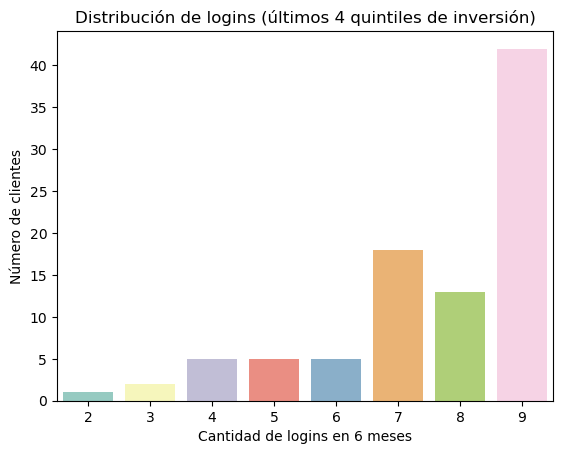

In [27]:
# Distribución de logins (últimos 4 quintiles de inversión)
sns.barplot(x=logins_por_frecuencia.index, y=logins_por_frecuencia.values, palette="Set3")
plt.title("Distribución de logins (últimos 4 quintiles de inversión)")
plt.xlabel("Cantidad de logins en 6 meses")
plt.ylabel("Número de clientes")
plt.show()

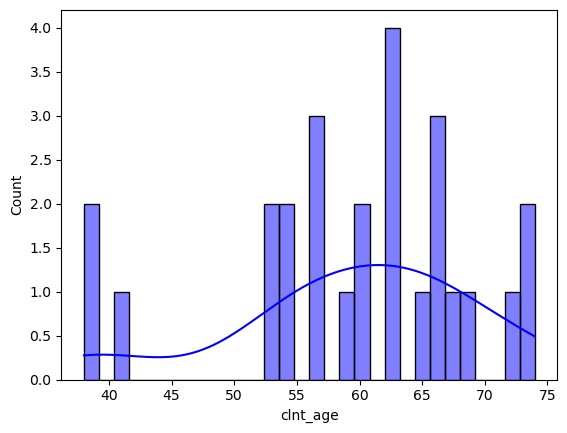

In [28]:
# Filtrar solo los clientes con 9 logons y mas de 4000000 de bal, así son los top clientes de la web 
df_filtrado = df_demo[(df_demo['logons_6_mnth'] == 9) & (df_demo['bal'] > 4_000_000)]

# Histograma de la edad de esos clientes
sns.histplot(df_filtrado['clnt_age'], kde=True, bins=30, color="blue")

plt.show()